<a href="https://colab.research.google.com/github/vivekswamy021/Admission_Prediction/blob/main/Admission_Prediction_of_a__Student_in_Institute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**STEP  1 : Business problem understanding**

- predicting the probability or chance of admit in institution of a candidate based on measurable features such as test scores, academic performance, and research experience.

##**STEP 2 : Load and collect data**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving admission_predict.csv to admission_predict.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


**Data Understanding**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**GRE Score** : Graduate Record Examination Score

- Standardized test score used for admission to graduate schools in the U.S.

**TOEFL Score** : Test of English as a Foreign Language Score

-  Measures English language proficiency for non-native speakers.

**University Rating**

 - A rating of the university's reputation or ranking (probably on a scale of 1 to 5).

**SOP** : Statement of Purpose

- Strength rating of the applicant’s SOP (possibly on a scale of 1 to 5).

**LOR** : Letter of Recommendation

- Strength rating of recommendation letters (scale of 1 to 5). Note: The space in "LOR " is likely a formatting issue.

**CGPA** :  Cumulative Grade Point Average

- Applicant's academic performance on a 10-point scale.

**Research**

- applicant has research experience (0 = No, 1 = Yes).

**Chance of Admit**

- Probability of admission (value between 0 and 1). Note: The space at the end "Chance of Admit " is a formatting issue.

In [6]:
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [7]:
df.shape

(500, 9)

**Exploratory Data Analysis**

In [8]:
df=df.rename(columns={'Chance of Admit ':'probability_of_admit','GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','SOP':'SOP_Rating','LOR ':'LOR'})

In [9]:
df.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP_Rating,LOR,CGPA,Research,probability_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.corr()['probability_of_admit']  #  correlations of all features with respect to Chance_of_Admit or probability_of_admit

,probability_of_admit
Serial No.,0.008505
GRE_Score,0.810351
TOEFL_Score,0.792228
University_Rating,0.690132
SOP_Rating,0.684137
LOR,0.645365
CGPA,0.882413
Research,0.545871
probability_of_admit,1.000000


In [11]:
df.isnull().any()

,0
Serial No.,False
GRE_Score,False
TOEFL_Score,False
University_Rating,False
SOP_Rating,False
LOR,False
CGPA,False
Research,False
probability_of_admit,False


In [12]:
df.isnull().sum()

,0
Serial No.,0
GRE_Score,0
TOEFL_Score,0
University_Rating,0
SOP_Rating,0
LOR,0
CGPA,0
Research,0
probability_of_admit,0


In [13]:
df.duplicated().sum()

np.int64(0)

##**Data Visualization**

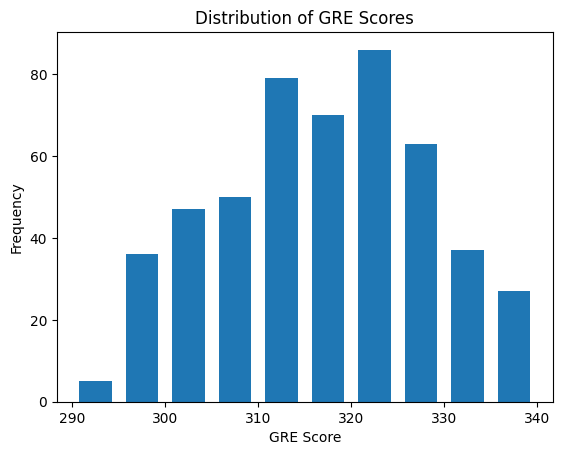

In [14]:
#Visualization of GRE scores
plt.hist(df['GRE_Score'],rwidth=0.7)
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.title('Distribution of GRE Scores')
plt.show()


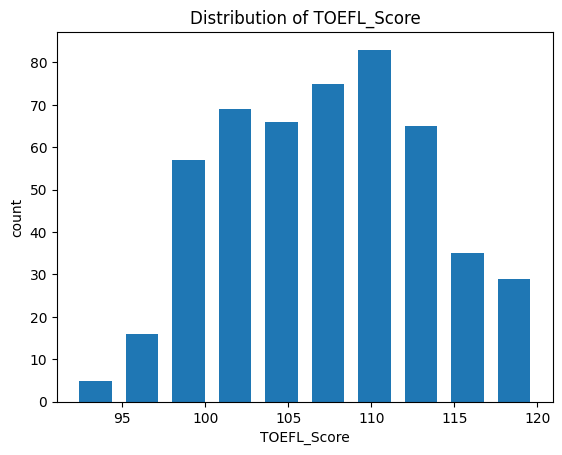

In [15]:
#Distribution of TOEFL SCORES
plt.hist(df['TOEFL_Score'],rwidth=0.7)
plt.xlabel('TOEFL_Score')
plt.ylabel('count')
plt.title('Distribution of TOEFL_Score')
plt.show()

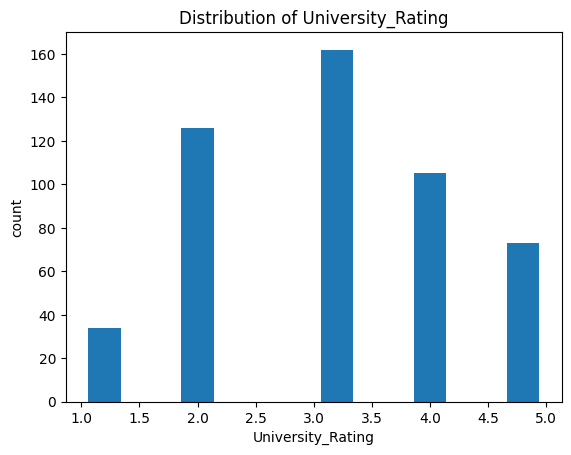

In [16]:
#Distribution of University Rating
plt.hist(df['University_Rating'],rwidth=0.7)
plt.xlabel('University_Rating')
plt.ylabel('count')
plt.title('Distribution of University_Rating')
plt.show()

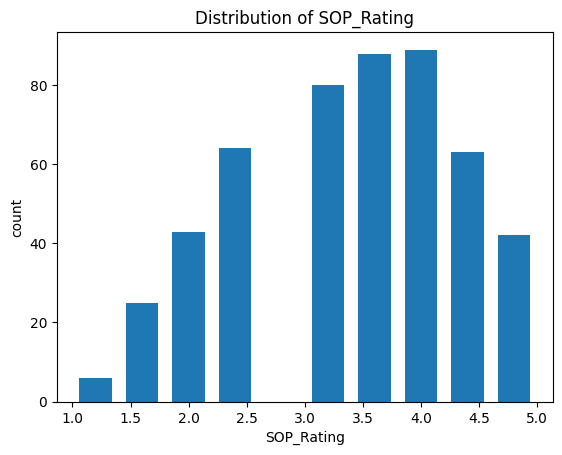

In [17]:
plt.hist(df['SOP_Rating'],rwidth=0.7)
plt.xlabel('SOP_Rating')
plt.ylabel('count')
plt.title('Distribution of SOP_Rating')
plt.show()

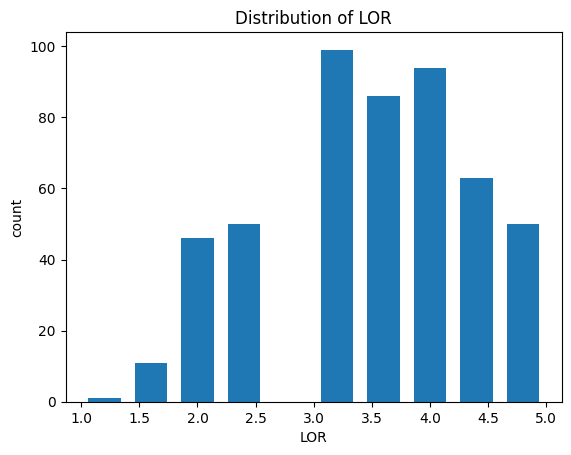

In [18]:
plt.hist(df['LOR'],rwidth=0.7)
plt.xlabel('LOR')
plt.ylabel('count')
plt.title('Distribution of LOR')
plt.show()

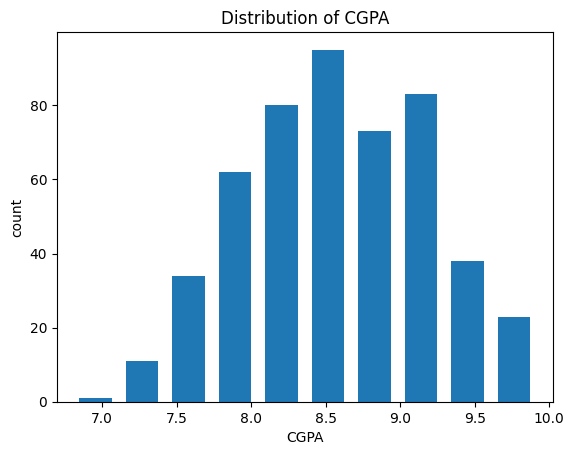

In [19]:
plt.hist(df['CGPA'],rwidth=0.7)
plt.xlabel('CGPA')
plt.ylabel('count')
plt.title('Distribution of CGPA')
plt.show()

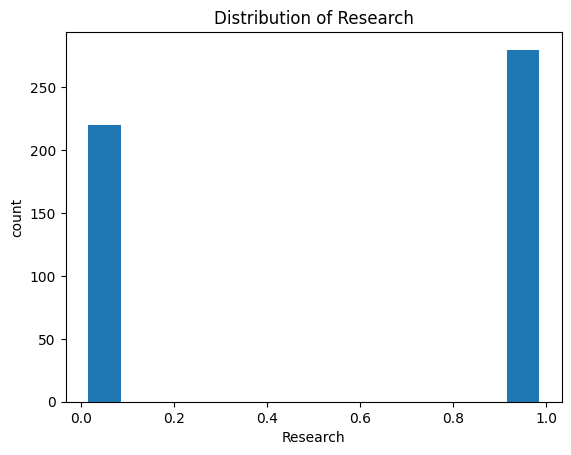

In [20]:
plt.hist(df['Research'],rwidth=0.7)    # rwidth = controls the relative width of the bars as a fraction of the bin width.
plt.xlabel('Research')
plt.ylabel('count')
plt.title('Distribution of Research')
plt.show()

**the relationship between each input feature and the target.**



In [21]:
input_features = ['GRE_Score', 'TOEFL_Score', 'CGPA']

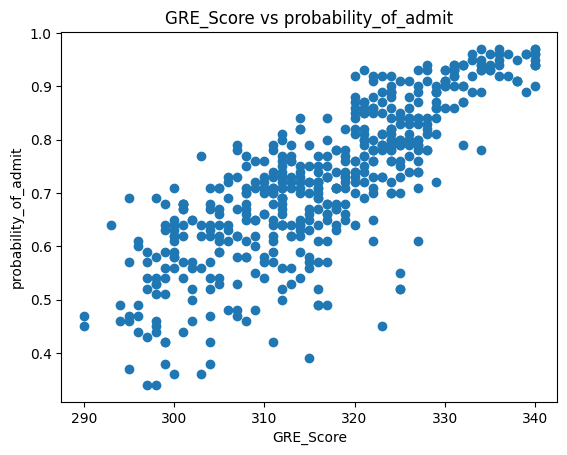

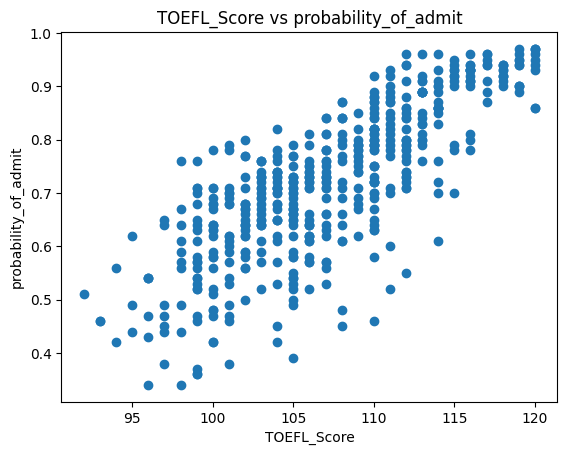

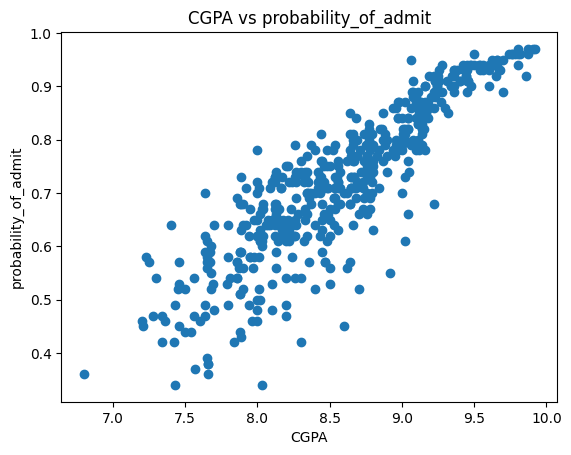

In [22]:
for feature in input_features:
    plt.scatter(df[feature], df['probability_of_admit'])
    plt.title(f'{feature} vs probability_of_admit')
    plt.xlabel(feature)
    plt.ylabel('probability_of_admit')
    plt.show()

**Data Cleaning**

In [23]:
df.drop(columns=['Serial No.'],inplace=True)  # serial no is not required for further analysis

In [24]:
#  # Replace 0s with NaN in continous features where 0 is present
df_copy=df.copy(deep=True)  # deep copy beacuse it donot effect original dataset if any changes is done to deep copy creates new object
df_copy[['GRE_Score','TOEFL_Score','University_Rating','SOP_Rating','LOR','CGPA']] = df_copy[['GRE_Score','TOEFL_Score','University_Rating','SOP_Rating','LOR','CGPA']].replace(0,np.nan)
df_copy.isnull().sum()

,0
GRE_Score,0
TOEFL_Score,0
University_Rating,0
SOP_Rating,0
LOR,0
CGPA,0
Research,0
probability_of_admit,0


- why replace 0 to Nan  : 0 means missing or invalid (like GRE=0), you should replace it with NaN so that your model doesn't learn from fake data.

- Research_Experience is a categorical feature so , 0 and 1 , means whether the applicant has done research or not (yes= 1 /no = 0)



In [25]:
df,df_copy

(     GRE_Score  TOEFL_Score  University_Rating  SOP_Rating  LOR  CGPA  \
 0          337          118                  4         4.5  4.5  9.65   
 1          324          107                  4         4.0  4.5  8.87   
 2          316          104                  3         3.0  3.5  8.00   
 3          322          110                  3         3.5  2.5  8.67   
 4          314          103                  2         2.0  3.0  8.21   
 ..         ...          ...                ...         ...  ...   ...   
 495        332          108                  5         4.5  4.0  9.02   
 496        337          117                  5         5.0  5.0  9.87   
 497        330          120                  5         4.5  5.0  9.56   
 498        312          103                  4         4.0  5.0  8.43   
 499        327          113                  4         4.5  4.5  9.04   
 
      Research  probability_of_admit  
 0           1                  0.92  
 1           1                  

##**X & Y Features**

In [26]:
x=df_copy.drop(columns=['probability_of_admit'])
y=df_copy['probability_of_admit']

In [27]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [29]:
#Creating a function to calculate best model for this problem
def find_best_model(x,y):
  models = {
      'linear_regression': {
          'model': LinearRegression(),
          'parameters': {
          }
      },
      'lasso': {
          'model': Lasso(),
          'parameters': {
              'alpha': [1, 2],
              'selection': ['random', 'cyclic']
          }
      },
      'svr':{
          'model':SVR(),
          'parameters':{
              'gamma':['auto','scale']
          }
      },
      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'parameters': {
              'criterion': ['squared_error', 'friedman_mse'],
              'splitter': ['best', 'random']
          }
      },
      'random_forest': {
          'model': RandomForestRegressor(criterion='squared_error'),
          'parameters': {
              'n_estimators': [5,10,15,50]
          }
      },
      'knn': {
          'model': KNeighborsRegressor(algorithm='auto'),
          'parameters': {
              'n_neighbors': [2,5,10,20]
          }
      }
  }
  scores = []
  for model_name, model_params in models.items():
      gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5,return_train_score=False)
      gs.fit(x, y)
      scores.append({
          'model': model_name,
          'best_score': gs.best_score_,
          'best_parameters': gs.best_params_
      })
  return pd.DataFrame(scores, columns=['model', 'best_parameters','best_score'])

find_best_model(x,y)

,model,best_parameters,best_score
0,linear_regression,{},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,decision_tree,"{'criterion': 'squared_error', 'splitter': 'ra...",0.586013
4,random_forest,{'n_estimators': 50},0.775277
5,knn,{'n_neighbors': 20},0.723012


##**since the linear regression algorithm has the highest accuracy,the model selected for the model is Linear regression**

In [30]:
print(len(x_train),len(x_test))

400 100


In [31]:
#Modelling and Evaluation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

#evaluation on Train and test data
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

#train RMSE , R2,CV, Test r2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,ypred_train)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,ypred_test)))


print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2:',r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model,x,y,cv=5).mean()*100)  # % of model

Train RMSE: 0.05938480848210054
Test RMSE: 0.06086588041578307
Train R2: 0.8210671369321553
Test R2: 0.8188432567829631
Cross Validation Score: 81.08015220863884


##**Prediction on new data**

In [32]:
new_data = pd.DataFrame({'GRE_Score': [337],'TOEFL_Score':[118],'University_Rating':[4],'SOP_Rating':[4.5],'LOR':[4.5],'CGPA':[9.65],'Research':[0]})
new_data

,GRE_Score,TOEFL_Score,University_Rating,SOP_Rating,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,0


In [33]:
print("chance of admit in foreign institute is:",model.predict(new_data)*100)   # *100 for probability

chance of admit in foreign institute is: [93.43658124]


In [34]:
model.coef_,model.intercept_

(array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
        0.11252708, 0.02402679]),
 np.float64(-1.4214470719016465))

**Another new Data University of California, Los Angeles (UCLA) – A top public research university in California, known for its programs in computer science, AI/ML, medicine, film, and more.**

In [36]:
UCLA_Admission = pd.DataFrame({'GRE_Score': [320],'TOEFL_Score':[113],'University_Rating':[2],'SOP_Rating':[2.0],'LOR':[2.5],'CGPA':[8.64],'Research':[1]})
UCLA_Admission

,GRE_Score,TOEFL_Score,University_Rating,SOP_Rating,LOR,CGPA,Research
0,320,113,2,2.0,2.5,8.64,1


In [37]:
print('chance of admission in UCLA is:',model.predict(UCLA_Admission)*100)

chance of admission in UCLA is: [74.42276373]
